In [1]:
# Only for google Colab
# !pip install cebra
# from google.colab import drive
# drive.mount('/content/drive/')
# !unzip /content/drive/MyDrive/Cebra_data/2020_11_9_MV1_run_brain.zip


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 171.3/171.3 kB 3.5 MB/s eta 0:00:00
Mounted at /content/drive/
Archive:  /content/drive/MyDrive/Cebra_data/2020_11_9_MV1_run_brain.zip
   creating: 2020_11_9_MV1_run_brain/
  inflating: 2020_11_9_MV1_run_brain/nomove_0001_0001.tif  
  inflating: 2020_11_9_MV1_run_brain/nomove_0001_0002.tif  
  inflating: 2020_11_9_MV1_run_brain/nomove_0001_0003.tif  
  inflating: 2020_11_9_MV1_run_brain/nomove_0001_0004.tif  
  inflating: 2020_11_9_MV1_run_brain/nomove_0001_0005.tif  
  inflating: 2020_11_9_MV1_run_brain/move_0001_0001.tif  
  inflating: 2020_11_9_MV1_run_brain/move_0001_0002.tif  
  inflating: 2020_11_9_MV1_run_brain/move_0001_0003.tif  
  inflating: 2020_11_9_MV1_run_brain/move_0001_0004.tif  
  inflating: 2020_11_9_MV1_run_brain/move_0001_0005.tif  
  inflating: 2020_11_9_MV1_run_brain/move_0002_0001.tif  
  inflating: 2020_11_9_MV1_run_brai

In [2]:
# !unzip /content/drive/MyDrive/Cebra_data/2020_11_9_MV1_run_behavior.zip

Archive:  /content/drive/MyDrive/Cebra_data/2020_11_9_MV1_run_behavior.zip
  inflating: nomove_0060_0002.tif    
  inflating: nomove_0060_0001.tif    
  inflating: nomove_0059_0001.tif    
  inflating: nomove_0058_0002.tif    
  inflating: nomove_0058_0001.tif    
  inflating: nomove_0057_0002.tif    
  inflating: nomove_0057_0001.tif    
  inflating: nomove_0056_0002.tif    
  inflating: nomove_0056_0001.tif    
  inflating: nomove_0055_0006.tif    
  inflating: nomove_0055_0005.tif    
  inflating: nomove_0055_0004.tif    
  inflating: nomove_0055_0003.tif    
  inflating: nomove_0055_0002.tif    
  inflating: nomove_0055_0001.tif    
  inflating: nomove_0054_0003.tif    
  inflating: nomove_0054_0002.tif    
  inflating: nomove_0054_0001.tif    
  inflating: nomove_0053_0003.tif    
  inflating: nomove_0053_0002.tif    
  inflating: nomove_0053_0001.tif    
  inflating: nomove_0052_0003.tif    
  inflating: nomove_0052_0002.tif    
  inflating: nomove_0052_0001.tif    
  inflating: 

In [4]:
!mkdir 2020_11_9_MV1_run_behavior


mkdir: cannot create directory ‘2020_11_9_MV1_run_behavior’: File exists


In [6]:
!mv *.tif 2020_11_9_MV1_run_behavior/

mv: cannot stat '.*.tif': No such file or directory


In [2]:
!conda init bash
!conda activate cebra-env

no change     /home/murphy/anaconda3/condabin/conda
no change     /home/murphy/anaconda3/bin/conda
no change     /home/murphy/anaconda3/bin/conda-env
no change     /home/murphy/anaconda3/bin/activate
no change     /home/murphy/anaconda3/bin/deactivate
no change     /home/murphy/anaconda3/etc/profile.d/conda.sh
no change     /home/murphy/anaconda3/etc/fish/conf.d/conda.fish
no change     /home/murphy/anaconda3/shell/condabin/Conda.psm1
no change     /home/murphy/anaconda3/shell/condabin/conda-hook.ps1
no change     /home/murphy/anaconda3/lib/python3.9/site-packages/xontrib/conda.xsh
no change     /home/murphy/anaconda3/etc/profile.d/conda.csh
no change     /home/murphy/.bashrc
No action taken.

CommandNotFoundError: Your shell has not been properly configured to use 'conda activate'.
To initialize your shell, run

    $ conda init <SHELL_NAME>

Currently supported shells are:
  - bash
  - fish
  - tcsh
  - xonsh
  - zsh
  - powershell

See 'conda init --help' for more information and op

In [43]:
import sys
import numpy as np
import matplotlib.pyplot as plt
from cebra import CEBRA
from PIL import Image
import cv2
import torch


In [39]:
if torch.cuda.is_available():
    DEVICE = "cuda"
else:
    DEVICE = "cpu"
print(DEVICE)

cuda


In [40]:
from logging import exception
def process_brain(path):
  try:
    brain_seq = cv2.imreadmulti(path)[1]
    brain_seq = np.array(brain_seq)
    brain_mask = (np.sum(brain_seq, axis=0) > 0)
    flat_seq = (brain_seq[:, brain_mask])
    return flat_seq.astype(float)
  except:
    print(np.shape(brain_seq))


In [41]:
# iterate through all brain data and process it
#https://stackoverflow.com/questions/10377998/how-can-i-iterate-over-files-in-a-given-directory
import os
neural_data = []
name_data = []
behav_data = []

filepath = "2020_11_9_MV1_run_brain"
for file in os.listdir(filepath):
     filename = os.fsdecode(file)
     if filename.endswith(".tif"):
         neural_data.append(process_brain(filepath + '/' + filename))
         name_data.append(filename)
         split_name = filename.split('_')
         session_data = []
         session_data.append(int(split_name[2].split('.')[0]))
         session_data.append(int(split_name[1]))
         behav_data.append(session_data)
         continue
     else:
         continue

In [5]:
# using https://github.com/facebookresearch/dinov2
# extract feature labels from images
import torch


In [29]:
# from https://huggingface.co/facebook/dino-vits8
# testing transformer
from transformers import ViTImageProcessor, ViTModel
from PIL import Image
import requests

url = 'http://images.cocodataset.org/val2017/000000039769.jpg'
image = Image.open(requests.get(url, stream=True).raw)

processor = ViTImageProcessor.from_pretrained('facebook/dino-vits8')
model = ViTModel.from_pretrained('facebook/dino-vits8')
device = "cuda:0" if torch.cuda.is_available() else "cpu"
model = model.to(device)
inputs = processor(images=image, return_tensors="pt").to(device)
outputs = model(**inputs)

Some weights of ViTModel were not initialized from the model checkpoint at facebook/dino-vits8 and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [31]:
np.size(outputs.pooler_output.cpu().detach().numpy())

384

In [32]:
def get_features(model, image):
  return model(**processor(images=image, return_tensors="pt").to(device)).pooler_output.cpu().detach().numpy()

In [33]:
from PIL import Image
import numpy as np

def np_to_PIL(numpy_image):
    return Image.fromarray(np.uint8(numpy_image)).convert('RGB')

In [34]:
def process_behav(path):
  beh_seq = cv2.imreadmulti(path)[1]
  beh_seq = np.array(beh_seq)
  feature_seq = []
  for beh_feat in beh_seq:
    feature_seq.append(get_features(model, np_to_PIL(beh_feat)))
  return np.array(feature_seq)


In [35]:
process_behav("2020_11_9_MV1_run_behavior/move_0001_0001.tif")

array([[[-0.74527895, -0.9245405 , -0.571785  , ..., -0.14651553,
          0.8670881 ,  0.7112836 ]],

       [[-0.7303746 , -0.9133858 , -0.57960606, ..., -0.23952235,
          0.88147557,  0.7741244 ]],

       [[-0.8193451 , -0.9284044 , -0.7141416 , ..., -0.12433311,
          0.8548025 ,  0.7191919 ]],

       ...,

       [[-0.70981467, -0.91932875, -0.7049153 , ..., -0.16899635,
          0.79533553,  0.17811306]],

       [[-0.39356595, -0.7550371 , -0.8833397 , ...,  0.05472029,
          0.91760004,  0.75487125]],

       [[-0.7635525 , -0.5961541 , -0.6745469 , ..., -0.30734006,
          0.9495258 ,  0.7950252 ]]], dtype=float32)

In [36]:
behav_feature = []
name_data_behav = []

filepath = "2020_11_9_MV1_run_behavior"
for file in os.listdir(filepath):
     filename = os.fsdecode(file)
     if filename.endswith(".tif"):
         behav_feature.append(process_behav(filepath + '/' + filename))
         name_data_behav.append(filename)
         split_name = filename.split('_')
         continue
     else:
         continue

In [37]:
import pickle
# open a file, where you ant to store the data
file = open('feature_labels', 'wb')

# dump information to that file
pickle.dump(behav_feature, file)

# close the file
file.close()

In [62]:
with open('feature_labels', 'rb') as f:
    behav_feature = pickle.load(f)


In [38]:

#generate mock behavioural data for time only run
mock_behav = []
for count, data in enumerate(neural_data):
    mock_behav.append(np.arange(np.size(data[:, 0]), dtype=float))


NameError: name 'neural_data' is not defined

In [46]:
out_dim = 8
max_iterations = 10

In [47]:
multi_cebra_model = CEBRA(batch_size=128,
                                output_dimension=out_dim,
                                max_iterations=5000,
                                verbose=True,
                                temperature_mode="auto",
                                device = "cuda_if_available",
                                max_adapt_iterations=10)

In [71]:
behav_data2 = []
for data in behav_feature:
    behav_data2.append(np.squeeze(data))
behav_feature = behav_data2


In [73]:
len(neural_data)

292

In [74]:
multi_cebra_model.fit(neural_data, behav_feature)
multi_cebra_model.save("cebra_multi_model.pt")

pos:  1.5837 neg:  7.9913 total:  9.5750 temperature:  0.2057: 100%|██████████| 5000/5000 [14:42:09<00:00, 10.59s/it]   


In [75]:
print(np.shape(mock_behav[1]))
np.shape(neural_data[1])

IndexError: list index out of range

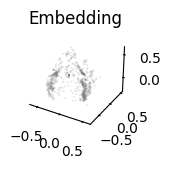

In [83]:

import cebra
fig = plt.figure()

ax1 = plt.subplot(141, projection='3d')

for run, data in enumerate(neural_data[:3]):
  embedding = multi_cebra_model.transform(data, session_id=run)
  ax1 = cebra.plot_embedding(embedding, ax=ax1)

plt.show()
